<a href="https://colab.research.google.com/github/DicheDiez10/CSCI-191-T-ML/blob/main/FeedForwardNetwork_2Units.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<strong>Feed Forward Network - 2Units Assignment</strong> <br>
### CSCI 191-T, David Ruby

>  Fall 2021




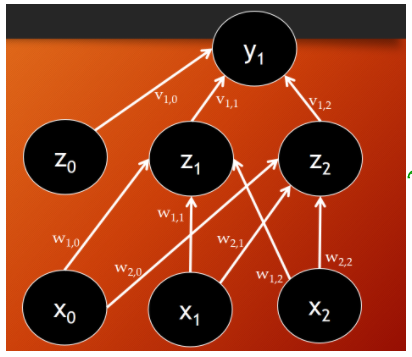

Based on the image above, this notebook will create a feed-forward network with the directionality of bottom-to-top. <br> 
The x nodes feed their respective z nodes which ultimately feed the y node <br>
<font color='red'>x0 and z0 are constant at a value of 1</font>

---
#<strong>Given Data</strong>


####Weight Vectors

In [ ]:
w1 = (3.19304864, 9.93278091, -4.74659947)

w2 = (-1.59451474, 9.97879746, 4.47953684)

v1 = (0.32620883, -8.71647388, 8.39004239)

#### Test Points <br>
These points are in the form of (x1 , x2)

In [ ]:
Test_Points = [ (0,0), (0,1), (1,0), (1,1) ]

#Printing for visualization
print("Test Points :" , Test_Points)
print("Individually selected :")
print('  '.join(map(str, Test_Points))) 

Test Points : [(0, 0), (0, 1), (1, 0), (1, 1)]
Individually selected :
(0, 0)  (0, 1)  (1, 0)  (1, 1)


---
#<strong>Libraries/Imports</strong>

In [ ]:
import math

---
#<strong>Useful Functions</strong>

####Sigmoid Function : *g(y) = 1 / (1 + e^-y)*



In [ ]:
def sigmoid(y):
  return 1.0/(1+math.exp(-y))

####F(w,x) Function : *w = set of weights (model) , x = set of points*


In [ ]:
def F(w,x):
  return sum([w*x for w,x in zip(w,x)])

####Classification Function : *Between 0 - 1 where anything >= 0.5 classifies as 1, else classifies as 0*

In [ ]:
def classification(model, X):
  return [1 if sigmoid(F(model, x)) >= 0.5 else 0 for x in X]

classification and sigmoid are shown below


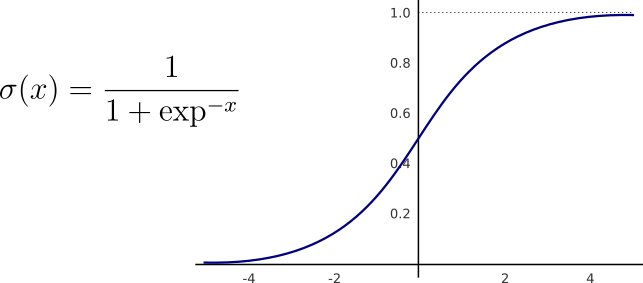

---
#<strong>Calculating</strong>

#### Since this is a feed forward network we start from the bottom with x nodes

In [ ]:
x1 = [x1 for (x1 , x2) in Test_Points]
x2 = [x2 for (x1 , x2) in Test_Points]

#The x0 is predefined to be a constant
#thus we need to set the values of the x nodes
#into tuples with 1 being for x0 in (x0,x1,x2)

x_tuples = [(1, x1, x2) for (x1, x2) in Test_Points]

print("\n All x1: " , x1)
print("\n All x2: " , x2)
print("\n All x tuples: " , x_tuples)


 All x1:  [0, 0, 1, 1]

 All x2:  [0, 1, 0, 1]

 All x tuples:  [(1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


#### The next row to be calculated will be the z nodes

In [ ]:
#z_ = [sigmoid(F(w_ , x_tuple)) for x_tuple in x_tuples] = w_ _0 * x[0] + w_ _1 * x[1] + w_ _2 * x[2]
z1 = [sigmoid(F(w1 , x_tuple)) for x_tuple in x_tuples]
z2 = [sigmoid(F(w2 , x_tuple)) for x_tuple in x_tuples]

#The z0 is predefined to be a constant
#thus we need to set the values of the x nodes
#into tuples with 1 being for x0 in (z0,z1,z2)

print("\n All z1: " , z1)
print("\n All z2: " , z2)
print("\n All z tuples: " , z_tuples)


 All z1:  [0.9605718456066229, 0.17457400953677152, 0.9999980069243171, 0.9997704660571543]

 All z2:  [0.16874965243320605, 0.9471010398304239, 0.9997716226203648, 0.9999974099209205]

 All z tuples:  [(1, 0.9605718456066229, 0.16874965243320605), (1, 0.17457400953677152, 0.9471010398304239), (1, 0.9999980069243171, 0.9997716226203648), (1, 0.9997704660571543, 0.9999974099209205)]


#### Finally the y node will be calculated

In [ ]:
#y1 = [F( v1, z) for z in z_tuples] = v1_0 *z0 + v1_1*z1 + v1_2*z2
y1 = [F(v1, z) for z in z_tuples]

print("y1 output (Array) :", y1, "\n")

print("y1 output (List) :")
for i in y1:
  print(i)

y1 output (Array) : [-6.630773834881156, 6.750756907536195, -0.0021213833039261942, 0.0017563357441172656] 

y1 output (List) :
-6.630773834881156
6.750756907536195
-0.0021213833039261942
0.0017563357441172656


#### Classification occurs based on the y1 results above

In [ ]:
# now have to classify those y1 results to get the y1 for 
# XOR table

#   x1  x2 | y1    pred y1
#   0   0  | _     0
#   0   1  | _     1
#   1   0  | _     1
#   1   1  | _     0

#Predicted set to compared our classifications with
#given that our test points are representative of XOR truth table x1 and x2
predicted_y1_based_on_XOR = [0,1,1,0]

#call classification function to get a set of classifications
set_of_classifications = classification(v1, z_tuples)
print("Set of Classifications: ", set_of_classifications)

#combined the x1 x2 and y1 into ((x1,x2),y1) to show the 
# classification alongside the test points
combined_x1_x2_y1 = zip(Test_Points, set_of_classifications)

print("Test Points w/ Classification:")
for a_tuple in combined_x1_x2_y1:
  print(a_tuple)

Set of Classifications:  [0, 1, 0, 1]
Test Points w/ Classification:
((0, 0), 0)
((0, 1), 1)
((1, 0), 0)
((1, 1), 1)


In [ ]:
#compare the classifications with what XOR should have output
list_classification_vs_XORoutput = zip(set_of_classifications, predicted_y1_based_on_XOR)

print("Classification vs XOR projected output")
for i in list_classification_vs_XORoutput:
  print(i)


Classification vs XOR projected output
(0, 0)
(1, 1)
(0, 1)
(1, 0)


---
#<strong>Conclusion</strong>
The only test point that yielded the expected classification was test point (0 , 1)
, the rest yielded opposite of what was expected being that this was based on an XOR table.